# Dataset boolean9: VP conjoined by and

Generating sentences of the form

- 1) **c will VERB1 COMPLEMENT1 or  VERB2 COMPLEMENT2, c will neither VERB1 COMPLEMENT1 nor VERB2 COMPLEMENT2 ** (contradiction)


- 2) **c will VERB1 COMPLEMENT1 or VERB2 COMPLEMENT2, c will not VERB1 COMPLEMENT1 and c will not  VERB2 COMPLEMENT2 ** (contradiction)


- 3) **c will VERB1 COMPLEMENT1 or VERB2 COMPLEMENT2, c will not VERB1 COMPLEMENT1 (VERB2 COMPLEMENT2)** (non-contradiction)


- 4) **c will VERB1 COMPLEMENT1 or  VERB2 COMPLEMENT2, d(c) will neither VERB1 COMPLEMENT1 (VERB3 COMPLEMENT3) nor VERB2 COMPLEMENT2 (VERB3 COMPLEMENT3) ** (non-contradiction)


In [1]:
import numpy as np
import pandas as pd
from word_lists import male_names, female_names, name_list
from word_lists import professions, color_list, city_list
from word_lists import verbs_third_person_past, verbs_third_person_past_CONTEXT
from word_lists import verbs_third_person_past_infinitiv_neg, positive_personality_list
import os
import inspect
import sys
import itertools


almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
for i in range(len(name_list)):
    name = get_new_item([], name_list)
    new_name = get_new_item([name], name_list)
    assert name != new_name and name in name_list and new_name in name_list

In [4]:
def replace_words(input_str, person, color, city, profession, pred):
    input_str = input_str.replace("PERSON's", person + "'s")
    input_str = input_str.replace("PERSON", person)    
    input_str = input_str.replace("COLOR", color)
    input_str = input_str.replace("CITY", city)
    input_str = input_str.replace("PROFESSION", profession)
    input_str = input_str.replace("PRED", pred)
    return input_str

In [5]:
print(replace_words("PERSON's house", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("a COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("PERSON a COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("me drive PERSON's COLOR car", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("what PERSON comment about CITY", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("of the being a PROFESSION", "Felipe", "blue", "Cluj", "saylor", "brave"))
print(replace_words("a PRED person", "Felipe", "blue", "Cluj", "saylor", "brave"))

Felipe's house
a blue car
Felipe a blue car
me drive Felipe's blue car
what Felipe comment about Cluj
of the being a saylor
a brave person


In [6]:
upper_bound = 11000 / 4

Creating a dict of infinitv verbs 2 context

#### IMPORTANTE EH PRECISO VER SE TODOS OS CONTEXTOS ESTAO NO FUTURO

In [7]:
inf2past = {}
for k, v in verbs_third_person_past_infinitiv_neg.items():
    if k != "was":
        words = v.split(" ")
        inf2past[words[1]] = k

infinitv_verbs = list(inf2past.keys())        
        
infinitiv_CONTEXT = {}
for verb in infinitv_verbs:
    infinitiv_CONTEXT[verb] = verbs_third_person_past_CONTEXT[inf2past[verb]]

- 1) **c will VERB1 COMPLEMENT1 or  VERB2 COMPLEMENT2, c will neither VERB1 COMPLEMENT1 nor VERB2 COMPLEMENT2 ** (contradiction)

In [8]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    verb1 = get_new_item([], infinitv_verbs)
    verb2 = get_new_item([verb1], infinitv_verbs)
    context = infinitiv_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = infinitiv_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    sentence = "{} will {} {} or {} {},{} will neither {} {} nor {} {}".format(person,
                                                                                  verb1,
                                                                                  complement1,
                                                                                  verb2,
                                                                                  complement2,
                                                                                  person,
                                                                                  verb1,
                                                                                  complement1,
                                                                                  verb2,
                                                                                  complement2,)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Beulah will stand in front of the crowd or grow up', 'Beulah will neither stand in front of the crowd nor grow up', 1]
['Lloyd will pay her or hear me', 'Lloyd will neither pay her nor hear me', 1]
["Leslie will drive the truck to Charlene's house or blow it when he didn't invest in Amazon", "Leslie will neither drive the truck to Charlene's house nor blow it when he didn't invest in Amazon", 1]
['Erika will lose the salmon car in Vaslui or come at noon', 'Erika will neither lose the salmon car in Vaslui nor come at noon', 1]
['Beverly will spend all my money or give Paula a yellow bicycle', 'Beverly will neither spend all my money nor give Paula a yellow bicycle', 1]
['Nicole will hold him close or send me a note', 'Nicole will neither hold him close nor send me a note', 1]
['Rosemary will hang up on me or build an airplane', 'Rosemary will neither hang up on me nor build an airplane', 1]
['Iris will meet him or hear me', 'Iris will neither meet him nor hear me', 1]
['Steven will hu

- 2) **c will VERB1 COMPLEMENT1 or VERB2 COMPLEMENT2, c will not VERB1 COMPLEMENT1 and c will not  VERB2 COMPLEMENT2 ** (contradiction)

In [9]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    verb1 = get_new_item([], infinitv_verbs)
    verb2 = get_new_item([verb1], infinitv_verbs)
    context = infinitiv_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = infinitiv_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    sentence = "{} will {} {} or {} {},{} will not {} {} and {} wil not {} {}".format(person,
                                                                                  verb1,
                                                                                  complement1,
                                                                                  verb2,
                                                                                  complement2,
                                                                                  person,
                                                                                  verb1,
                                                                                  complement1,
                                                                                  person,
                                                                                  verb2,
                                                                                  complement2,)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Tracey will stand in front of the crowd or become the most important hairdresser in this town', 'Tracey will not stand in front of the crowd and Tracey wil not become the most important hairdresser in this town', 1]
['Clayton will make tea or choose this way of life', 'Clayton will not make tea and Clayton wil not choose this way of life', 1]
["Marvin will lead me to Ronald's house or freeze my account", "Marvin will not lead me to Ronald's house and Marvin wil not freeze my account", 1]
['Beatrice will bet on the wining horse or sit on the floor', 'Beatrice will not bet on the wining horse and Beatrice wil not sit on the floor', 1]
['Terrence will let use this pen or ring from Barcelona to Tulcea', 'Terrence will not let use this pen and Terrence wil not ring from Barcelona to Tulcea', 1]
['Michael will lay his hands on her or blow me off', 'Michael will not lay his hands on her and Michael wil not blow me off', 1]
['Samantha will forgive me or draw ahead of the other runners', 'Sam

- 3) **c will VERB1 COMPLEMENT1 or VERB2 COMPLEMENT2, c will not VERB1 COMPLEMENT1 (VERB2 COMPLEMENT2)** (non-contradiction)

In [10]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    verb1 = get_new_item([], infinitv_verbs)
    verb2 = get_new_item([verb1], infinitv_verbs)
    context = infinitiv_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = infinitiv_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    if i % 2 == 0:
        verb_p = verb1
        complement_p = complement1
    else:
        verb_p = verb2
        complement_p = complement2
    sentence = "{} will {} {} or {} {},{} will not {} {}".format(person,
                                                                 verb1,
                                                                 complement1,
                                                                 verb2,
                                                                 complement2,
                                                                 person,
                                                                 verb_p,
                                                                 complement_p)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Salvador will choose this way of life or say funny things', 'Salvador will not choose this way of life', 0]
['Agnes will build an altar for Arnold or bet on the game', 'Agnes will not bet on the game', 0]
['Jeffrey will put the phone down or sing a nice song', 'Jeffrey will not put the phone down', 0]
["Eileen will hang up on Neil or let me drive Cassandra's gray car", "Eileen will not let me drive Cassandra's gray car", 0]
['Jack will forgive me or go away', 'Jack will not forgive me', 0]
['Billie will shut the door down or ring from me', 'Billie will not ring from me', 0]
['Salvador will feel an outsider or hide behind a bush', 'Salvador will not feel an outsider', 0]
['Janice will hide a smile or take the ashy shirt out of the washer', 'Janice will not take the ashy shirt out of the washer', 0]
['Lorraine will sell me a icy car or blow me off', 'Lorraine will not sell me a icy car', 0]
['Grace will speak to her about Javier or hide a smile', 'Grace will not hide a smile', 0]


- 4) **c will VERB1 COMPLEMENT1 or  VERB2 COMPLEMENT2, d(c) will neither VERB1 COMPLEMENT1 (VERB3 COMPLEMENT3) nor VERB2 COMPLEMENT2 (VERB3 COMPLEMENT3) ** (non-contradiction)


In [11]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    person1 = get_new_item([person], name_list)
    person2 = get_new_item([person, person1], name_list)
    person3 = get_new_item([person, person1, person2], name_list)
    other_person = get_new_item([person, person1, person2, person3], name_list)
    color1 = get_new_item([], color_list)
    color2 = get_new_item([color1], color_list)
    color3 = get_new_item([color1, color2], color_list)
    city1 =  get_new_item([], city_list)
    city2 =  get_new_item([city1], city_list)
    city3 = get_new_item([city1, city2], city_list)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    profession3 = get_new_item([profession1, profession2], professions)
    pred1 = get_new_item([], positive_personality_list)
    pred2 = get_new_item([pred1], positive_personality_list)
    pred3 = get_new_item([pred1, pred2], positive_personality_list)
    verb1 = get_new_item([], infinitv_verbs)
    verb2 = get_new_item([verb1], infinitv_verbs)
    verb3 = get_new_item([verb1, verb2], infinitv_verbs)
    context = infinitiv_CONTEXT[verb1]
    complement1 = get_new_item([], context)
    complement1 = replace_words(complement1, person1, color1, city1, profession1, pred1)
    context = infinitiv_CONTEXT[verb2]
    complement2 = get_new_item([], context)
    complement2 = replace_words(complement2, person2, color2, city2, profession2, pred2)
    context = infinitiv_CONTEXT[verb3]
    complement3 = get_new_item([], context)
    complement3 = replace_words(complement3, person3, color3, city3, profession3, pred3)
    if i % 2 == 0:
        person_p = other_person
        verb_p_1 =  verb1
        complement_p_1 =  complement1
        verb_p_2 =  verb2
        complement_p_2 =  complement2
    else:
        if i % 3 == 0:
            person_p = person
            verb_p_1 =  verb1
            complement_p_1 =  complement1
            verb_p_2 =  verb3
            complement_p_2 =  complement3
        else:
            person_p = person
            verb_p_1 =  verb3
            complement_p_1 =  complement3
            verb_p_2 =  verb2
            complement_p_2 =  complement2
        
    sentence = "{} will {} {} or {} {},{} will neither {} {} nor {} {}".format(person,
                                                                               verb1,
                                                                               complement1,
                                                                               verb2,
                                                                               complement2,
                                                                               person_p,
                                                                               verb_p_1,
                                                                               complement_p_1,
                                                                               verb_p_2,
                                                                               complement_p_2)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Gordon will drive awayto the bus stop or hear Evelyn', 'Gilbert will neither drive awayto the bus stop nor hear Evelyn', 0]
['Rosie will have a good daya good conversation with Sally or throw everything out the window', 'Rosie will neither draw ahead of the other runners nor throw everything out the window', 0]
['Clarence will beat Maggie out of 20 dollars or burn the flag', 'Jared will neither beat Maggie out of 20 dollars nor burn the flag', 0]
['Jose will build an altar for Yolanda or bet on the game', 'Jose will neither build an altar for Yolanda nor write me about Ted', 0]
['Victor will swim out toward the white boat or think I was living in Slobozia', 'Harriet will neither swim out toward the white boat nor think I was living in Slobozia', 0]
["Kristin will break Jessie's heart or ring from me", 'Kristin will neither sleep for eight hours nor ring from me', 0]
['Pedro will buy a blue bicycle or bet on the icy car', 'Nancy will neither buy a blue bicycle nor bet on the icy car',

In [12]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)


all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [13]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Leona will say nice things or know Jenny's secret,Leona will not say nice things and Leona wil n...,1
10996,Juana will show my new photos or stand up to C...,Juana will not show my new photos,0
10997,Lloyd will show my new photos or fall in love ...,Lloyd will not show my new photos,0
10998,Wallace will tell me about the bars in Slatina...,Wallace will neither tell me about the bars in...,1
10999,Janie will lead me to Kristin's house or read ...,Janie will neither ride the buffalo nor read t...,0


#### Looking at the label distribution

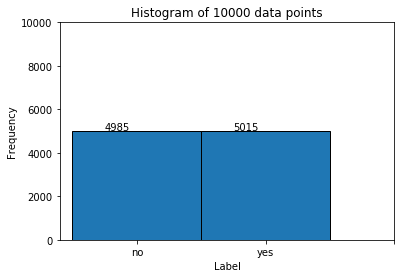

In [14]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean9_train.png")

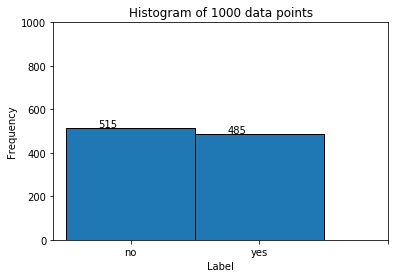

In [15]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean9_test.png")

### Saving to CSV

In [16]:
df_train.to_csv("boolean9_train.csv", index=False)
df_test.to_csv("boolean9_test.csv", index=False)